In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/Classified-BioFluidsLab-IITK-JDexperiment.csv"
df=pd.read_csv(file_path)

In [ ]:
print(df.head())
print(df.shape)

              d         B         Q         dT          E
0  1.935247e-09  5.807790  1.771646  15.705398  -3.221133
1  4.758500e-09  5.269716  2.564045   9.550877   0.652858
2  3.686770e-09  3.510369       NaN  13.793920        NaN
3  3.033427e-09  4.932127  2.510767  47.348940  -0.819294
4  8.644913e-10  3.650966  1.413866  88.453402 -40.038999
(100000, 5)


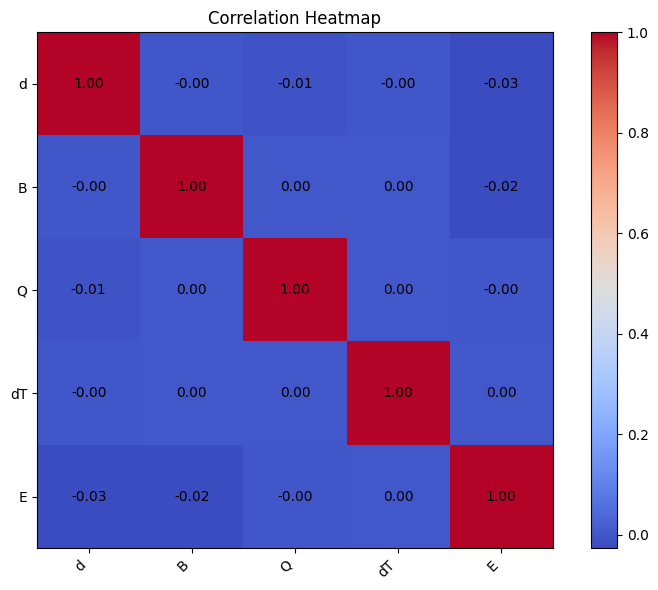

In [ ]:
# Computing the correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


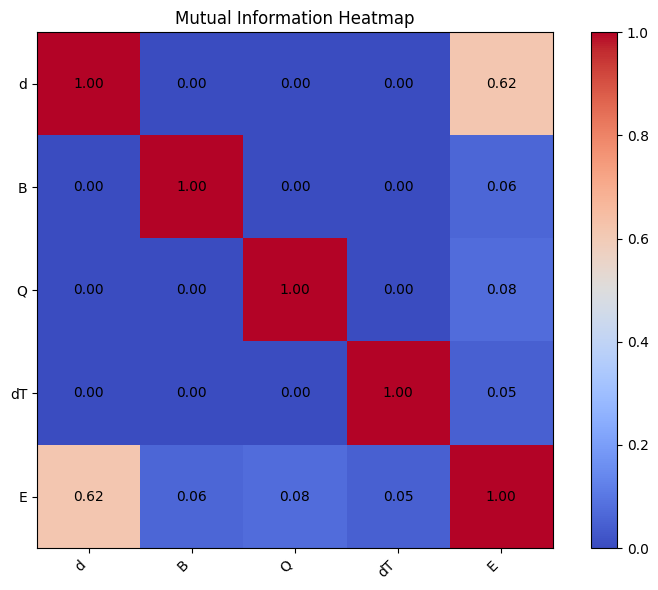

In [ ]:
from sklearn.feature_selection import mutual_info_regression

df = df.dropna()

features = df.columns
X = df[features]

# Computing mutual information matrix
mi_matrix = np.zeros((len(features), len(features)))

for i in range(len(features)):
    for j in range(len(features)):
        if i == j:
            mi_matrix[i, j] = 1
        else:
            mi_matrix[i, j] = mutual_info_regression(X[[features[i]]], X[features[j]]).item()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(mi_matrix, cmap="coolwarm", interpolation="nearest")

fig.colorbar(cax)

ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_yticklabels(features)

for i in range(len(features)):
    for j in range(len(features)):
        ax.text(j, i, f"{mi_matrix[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Mutual Information Heatmap")
plt.tight_layout()
plt.show()

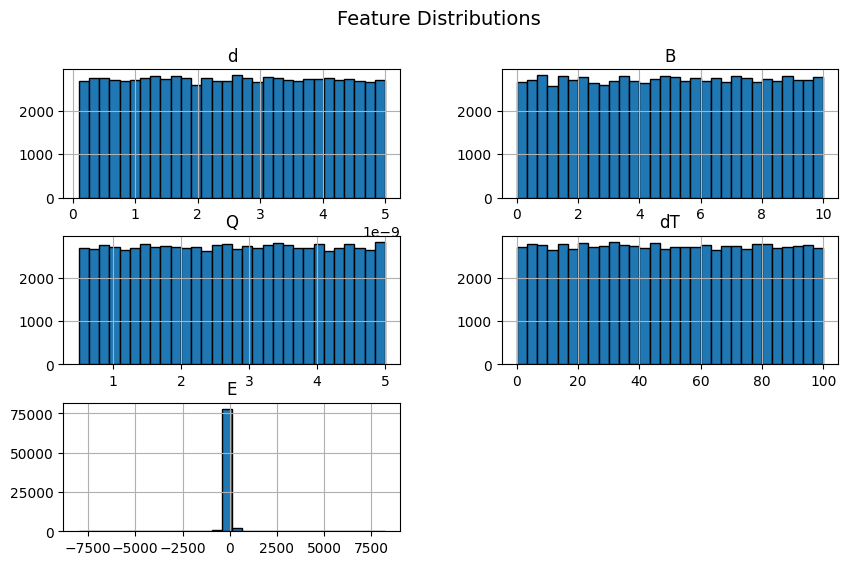

In [ ]:
#plotting histograms for features
df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

In [ ]:
class LinearRegression:

    def __init__(self, design_matrix, labels, learning_rate=0.000000001, regularisation=0, normalise=True, hyperpar=0.1):

        self.learning_rate = learning_rate
        self.design_matrix = design_matrix.to_numpy()
        self.labels = labels.to_numpy().reshape(-1)
        self.weights = np.random.rand(design_matrix.shape[1])
        self.bias = 0
        self.hyperparam=hyperpar
        self.norm = normalise
        self.type = regularisation
        self.n = len(self.design_matrix)

    def standardise(self):

        matrix = []

        for i in self.design_matrix.transpose():
            matrix.append((i-np.mean(i))/np.std(i))
        return np.array(matrix).transpose()

    def predict(self, prediction_features):

        predictions = []

        for i in prediction_features:
            predictions.append(np.dot(self.weights, i) + self.bias)

        return np.array(predictions)


    def predict_test(self, prediction_features):

        prediction_features = prediction_features.to_numpy()

        return self.predict(prediction_features)


    def train_model(self, tolerance=0.0001):

        if self.norm:
            self.design_matrix = self.standardise()

        if self.type==0:
            predictions = self.predict(self.design_matrix)
            delta = np.subtract(predictions,self.labels)
            cost=np.dot(delta, delta)

            prev_cost=cost+1

            while prev_cost-cost>tolerance:

                self.weights -= self.learning_rate*np.dot(self.design_matrix.transpose(), delta)
                self.bias -= self.learning_rate*np.sum(delta)

                predictions = self.predict(self.design_matrix)

                delta = np.subtract(predictions, self.labels)
                prev_cost=cost
                cost = np.dot(delta, delta)

            return self.weights, self.bias

        if self.type==1:
            predictions = self.predict(self.design_matrix)
            delta = np.subtract(predictions,self.labels)
            cost=np.dot(delta, delta) + self.hyperparam*np.dot(self.weights, self.weights)

            prev_cost=cost+1

            while prev_cost-cost>tolerance:

                self.weights -= self.learning_rate*(np.dot(self.design_matrix.transpose(), delta) + self.hyperparam*np.divide(self.weights, np.absolute(self.weights)))
                self.bias -= self.learning_rate*(np.sum(delta) + self.hyperparam*np.divide(self.weights, np.absolute(self.weights)))

                predictions = self.predict(self.design_matrix)

                delta = np.subtract(predictions, self.labels)
                prev_cost=cost
                cost = np.dot(delta, delta) + self.hyperparam*np.dot(self.weights, self.weights)

            return self.weights, self.bias

        if self.type==2:
            predictions = self.predict(self.design_matrix)
            delta = np.subtract(predictions,self.labels)
            cost=np.dot(delta, delta) + self.hyperparam*np.sum(np.absolute(self.weights))

            prev_cost=cost+1

            while prev_cost-cost>tolerance:

                self.weights -= self.learning_rate*(np.dot(self.design_matrix.transpose(), delta) + self.hyperparam*np.sum(self.weights))
                self.bias -= self.learning_rate*(np.sum(delta) + self.hyperparam*np.sum(self.weights))

                predictions = self.predict(self.design_matrix)

                delta = np.subtract(predictions, self.labels)
                prev_cost=cost
                cost = np.dot(delta, delta) + self.hyperparam*np.sum(np.absolute(self.weights))

            return self.weights, self.bias


    def mse(self, predictions, labels):
        return np.mean((predictions-labels)**2)

    def mae(self, predictions, labels):
        return np.mean(np.absolute(predictions-labels))

    def r2_score(self, predictions, labels):
        return 1-(np.sum((predictions-labels)**2)/np.sum(predictions-np.mean(labels)))

    def model_evaluation(self, predictions, labels):
        print(f"R squared score: {self.r2_score(predictions, labels)}")
        print(f"Mean Squared Error: {self.mse(predictions, labels)}")
        print(f"Mean Absolute Error: {self.mae(predictions, labels)}")

        plt.title("Predicted vs True Values")
        plt.scatter(predictions, labels)
        plt.xlabel("Predicted Values")
        plt.ylabel("True Values")
        plt.show()

In [ ]:
def mse(slope, intercept, x_train, y_train):
  pred=[]
  total_sq_error=0
  for i in range(len(x_train)):
     prediction = np.dot(x_train[i], slope) + intercept
     pred.append(prediction)
     total_sq_error += (y_train[i] - prediction) ** 2

  error=total_sq_error/float(len(x_train))
  return error, np.array(pred)

In [ ]:
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):

    for i in range(iter_val):
        int_slope = np.zeros(x_train.shape[1])
        int_intercept = 0
        n_pt = float(len(x_train))


        for j in range(len(x_train)):
            error = y_train[j] - (np.dot(x_train[j], s_slope) + s_intercept)

            int_intercept += - (2/n_pt) * error

            int_slope += - (2/n_pt) * x_train[j] * error
        s_slope = s_slope - (l_rate * int_slope)
        s_intercept = s_intercept - (l_rate * int_intercept)
    return  s_slope, s_intercept


def rsq(prediction, y_test):
    total_data = len(prediction)
    y_avg = np.sum(y_test)/total_data
    tot_err = np.sum((y_test-y_avg)**2)

    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2


Stochastic Gradient Descent

In [ ]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_loss(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def compute_gradients(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    dw = (1 / m) * np.dot(X.T, (predictions - y))
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

def stochastic_gradient_descent(X, y, w, b, learning_rate, epochs, tolerance=1e-6):  #setting up a tolerance limit as the loss stops converging beyond a point
    m = len(X)
    prev_loss = float('inf')
    for epoch in range(epochs):
        for i in range(m):

            X_i = X[i:i+1]
            y_i = y[i:i+1]

            dw, db = compute_gradients(X_i, y_i, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db

        if epoch % 100 == 0:
            loss = compute_loss(X, y, w, b)

            if abs(prev_loss - loss) < tolerance:
              print(f"Converged at epoch {epoch}, Loss: {loss}")
              break
            prev_loss = loss
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, b

w = np.random.randn(1)  # Initialize weights
b = np.random.randn()   # Initialize bias


Mini Batch Gradient Descent

In [ ]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_loss(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def compute_gradients(X, y, w, b):
    m = len(X)
    predictions = predict(X, w, b)
    dw = (1 / m) * np.dot(X.T, (predictions - y))
    db = (1 / m) * np.sum(predictions - y)
    return dw, db

def mini_batch_gradient_descent(X, y, w, b, learning_rate, epochs, batch_size, tolerance=1e-6):
    m = len(X)
    prev_loss = float('inf')

    for epoch in range(epochs):

        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Iterating over mini-batches
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db

        loss = compute_loss(X, y, w, b)

        # Checking if the loss has stopped decreasing (convergence)
        if abs(prev_loss - loss) < tolerance:
            print(f"Converged at epoch {epoch}, Loss: {loss}")
            break

        prev_loss = loss

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return w, b

Locally weighed Regression

In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

class LocallyWeightedRegressionSK:
    def __init__(self, tau=0.1, k_neighbors=500):

        self.tau=tau
        self.k_neighbors=k_neighbors

    def compute_weights(self, distances):

        return np.exp(-distances ** 2 / (2 * self.tau ** 2))

    def predict(self, X_train, y_train, X_query):

        nbrs=NearestNeighbors(n_neighbors=self.k_neighbors, algorithm='ball_tree').fit(X_train)
        y_pred=np.zeros(X_query.shape[0])

        for i, x_q in enumerate(X_query):
            distances, indices=nbrs.kneighbors([x_q])
            weights=self.compute_weights(distances.flatten())

            X_neigh, y_neigh=X_train[indices.flatten()], y_train[indices.flatten()]
            W = np.diag(weights)

            # Solve Weighted Least Squares using Linear Regression
            model=LinearRegression(fit_intercept=False)
            model.fit(X_neigh, y_neigh, sample_weight=weights)

            y_pred[i]=model.predict([x_q])

        return y_pred


tau=0.5  # Bandwidth parameter
lwr=LocallyWeigtedRegressionSK(tau=tau, k_neighbors=500)

# Train & Predict
y_pred_lwr=lwr.predict(X, y, X)

# Evaluate
evaluate_model(lwr, X, y)


NameError: name 'LocallyWeigtedRegressionSK' is not defined

Implementing Polynomial Regression

Mean Squared Error: 86250.6974
R² Score: 0.0035
Predicted E: 3.9010


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


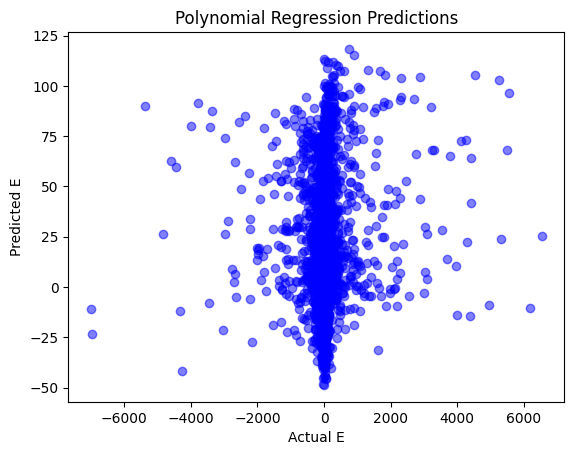

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = df.dropna()

X = df[['d', 'B', 'Q', 'dT']]
y = df['E']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

new_data = np.array([[1.5e-09, 4.5, 2.0, 20.0]])
new_pred = model.predict(new_data)
print(f"Predicted E: {new_pred[0]:.4f}")

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual E")
plt.ylabel("Predicted E")
plt.title("Polynomial Regression Predictions")
plt.show()
